In [11]:
from qiskit.circuit import Parameter, QuantumCircuit
from qiskit import transpile

import numpy as np

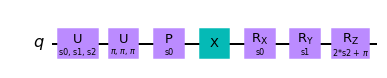

In [36]:
parameter_num=3
parameters=[]
for i in range(parameter_num):
    parameters.append(Parameter('s%i'%i))

simple=QuantumCircuit(1)

simple.u(parameters[0],parameters[1],parameters[2],0)
simple.u(np.pi,np.pi,np.pi,0)
simple.p(parameters[0],0)
simple.x(0)
simple.rx(parameters[0],0)
simple.ry(parameters[1],0)
simple.rz(2*parameters[2]+np.pi,0)
simple.draw('mpl')

In [37]:
cir=transpile(simple,basis_gates=['id','cx','u'], optimization_level=0)
cir.draw()

global phase: -1.0*s2 - π/2
   ┌─────────────┐┌──────────┐┌───────────┐┌──────────┐┌────────────────┐»
q: ┤ U(s0,s1,s2) ├┤ U(π,π,π) ├┤ U(0,0,s0) ├┤ U(π,0,π) ├┤ U(s0,-π/2,π/2) ├»
   └─────────────┘└──────────┘└───────────┘└──────────┘└────────────────┘»
«   ┌───────────────┐┌─────────────────┐
«q: ┤ U(s1,0.0,0.0) ├┤ U(0,0,2*s2 + π) ├
«   └───────────────┘└─────────────────┘

In [83]:
# dict(enumerate(cir.parameters))
dict((v,k) for k, v in dict(enumerate(cir.parameters)).items())

{Parameter(s0): 0, Parameter(s1): 1, Parameter(s2): 2}

In [58]:
p=cir.global_phase
p

ParameterExpression(-1.0*s2 - 1.5707963267949)

In [59]:
tuple(p.parameters)[0]

Parameter(s2)

In [72]:
const=p.bind({tuple(p.parameters)[0]:0})
const.sympify().simplify()

-1.5707963267949

In [69]:
coeff=p.bind({tuple(p.parameters)[0]:1})-const
coeff.sympify().simplify()

-1.0

In [85]:
np.array([1,2,3])/2

array([0.5, 1. , 1.5])

In [60]:
p.subs({tuple(p.parameters)[0]})

CircuitError: "Cannot bind Parameters (['0']) not present in expression."

In [39]:
p.sympify()

(3.14159265358979 + 2*s2)*-0.5

In [40]:
gate=simple.data[4]
# print(gate[0].to_matrix())
params=gate[0].params
params

[Parameter(s0)]

In [41]:
gate=cir.data[4]
# print(gate[0].to_matrix())
params=gate[0].params
params

[Parameter(s0),
 ParameterExpression(-1.5707963267949),
 ParameterExpression(1.5707963267949)]

In [75]:

tuple(params[1].parameters)

()

用 is_parameterized() 就可以確認是否含有變數

https://qiskit.org/documentation/_modules/qiskit/circuit/instruction.html#Instruction.is_parameterized


In [9]:
gate[0].is_parameterized()

True

In [47]:
for item in params:
    print(item.parameters)

{Parameter(s0)}
set()
set()


In [5]:
params=gate[0].params

from qiskit.circuit import Parameter
is_Parameter= lambda element: isinstance(element,Parameter)

if len(params)>0:
    def check_condition(lst, condition):
        for element in lst:
            if condition(element):
                return True
        return False
    if check_condition(params,is_Parameter):
        print('True')
    else:
        print('False')

True
